In [1]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 KB 4.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.8 MB/s eta 0:00:00


In [4]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        
        # Bias should have shape [out_channels] 
        if bias:
            self.b = nn.Parameter(torch.zeros(out_channels))
        self.F = out_channels
        self.C = in_channels
        
        if type(kernel_size)==int:
            self.kernel_size = (kernel_size, kernel_size)
        else:
            self.kernel_size = kernel_size
            
        if type(stride)==int:
            self.stride = (stride, stride)
        else:
            self.stride = stride
            
        if type(padding)==int:
            self.padding = (padding, padding)
        else:
            self.padding = padding
            
        self.w = nn.Parameter(torch.zeros(out_channels, in_channels, *self.kernel_size))
        self.bias = bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass   
        assert x.size(1) == self.C, "Number of in channels do not match"
        out_size0 = int(((x.size(2)+2*self.padding[0]-self.kernel_size[0])/self.stride[0])+1)
        out_size1 = int(((x.size(3)+2*self.padding[1]-self.kernel_size[1])/self.stride[1])+1)
        
        inp = F.unfold(x,kernel_size=self.kernel_size, padding=self.padding, stride=self.stride)
        
        out_unf = inp.transpose(1,2).matmul(self.w.view(self.w.size(0), -1).t()).transpose(1, 2)
        
        out = F.fold(out_unf, output_size=(out_size0, out_size1), kernel_size=(1,1))
        
        if self.bias:
            out+=self.b.unsqueeze(0).unsqueeze(-1).unsqueeze(-1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out 

In [6]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        #k = tuple((kernel_size,))
        #self.kernel_size = (k[0], k[-1])
        if type(kernel_size)==int:
            self.kernel_size = (kernel_size, kernel_size)
        else:
            self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        windows = x.unfold(2, self.kernel_size[0], self.kernel_size[0]).unfold(3, self.kernel_size[1], self.kernel_size[1])
        # view the windows as (kh * kw)
        windows = windows.contiguous().view(*windows.size()[:-2], -1)
        max_val, _ = windows.max(4)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return max_val

In [21]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [22]:
torch.manual_seed(rng_seed)
x = torch.rand((2,3,64,64))
#x = torch.rand((2,3,64,47))
student_pool = MaxPool2d((4,5))
print(student_pool.kernel_size)
torch_pool = nn.MaxPool2d((4,5))
my_val = student_pool.forward(x)
torch_val = torch_pool.forward(x)
print(torch.sum((my_val-torch_val).abs()))


(4, 5)
tensor(0.)


In [23]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = nn.Parameter(torch.zeros(in_channels, out_channels))
        self.b = nn.Parameter(torch.zeros(out_channels))
        self.bias = bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = x.matmul(self.w)
        if self.bias:
            out+=self.b
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [18]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [19]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: the value used for the running_mean and running_var
        computation. Default: 0.1 . (i.e. 1-momentum for running mean)
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        
        self.running_mean = torch.zeros(1,num_features,1,1)
        self.running_var = torch.ones(1,num_features,1,1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        assert x.size(1)==self.num_features, "Feature dimensions do not match"
        if not torch.is_grad_enabled():
            #During testing phase
            norm_x = (x-self.running_mean) / torch.sqrt(self.running_var + self.eps)
        else:
            #During training phase
            mean = x.mean(dim=(0, 2, 3), keepdim=True)
            var = x.var(dim=(0, 2, 3), keepdim=True, unbiased=False)
            norm_x = (x - mean) / torch.sqrt(var + self.eps)
        
            self.running_mean = (1.0 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1.0 - self.momentum) * self.running_var + self.momentum * var
            
        x = self.gamma.unsqueeze(0).unsqueeze(-1).unsqueeze(-1) * norm_x + self.beta.unsqueeze(0).unsqueeze(-1).unsqueeze(-1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [20]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [ ]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2023-02-01 09:44:05--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M   368KB/s    in 6m 9s   

2023-02-01 09:50:16 (366 KB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2023-02-01 09:50:17--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1’

nload=1              84%[===============>    ]   1.09G  1.34MB/s    eta 8

In [20]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.transforms.autoaugment import AutoAugmentPolicy
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)
ON_COLAB = False
torch.autograd.set_detect_anomaly(True)

In [21]:
class MapDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, map_fn):
        self.dataset = dataset
        self.map = map_fn

    def __getitem__(self, index):
        #converter = transforms.ToPILImage()
        if self.map:     
            x = self.map(self.dataset[index][0]) 
        else:     
            x = self.dataset[index][0]  # image
        y = self.dataset[index][1]   # label      
        return x, y

    def __len__(self):
        return len(self.dataset)

In [22]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform_test = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )

transform_train = transforms.Compose(
        [
            transforms.AutoAugment(AutoAugmentPolicy.IMAGENET),
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )

##_Tried transforms ##
"""transforms.RandomRotation(90), 
transforms.RandomHorizontalFlip(0.5),
transforms.RandomApply((transforms.GaussianBlur(5),), p=0.5),
transforms.RandomPerspective(p=0.7)"""

train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

og_dataset = datasets.ImageFolder(train_path)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)


# Create train val split
n = len(og_dataset)
print(n)
n_val = int(n/10)

train_set_mini, val_set_mini = torch.utils.data.random_split(og_dataset, [(n-n_val), n_val])
train_set = train_set_mini + train_set_mini + train_set_mini
val_set = val_set_mini + val_set_mini + val_set_mini

training_data = MapDataset(train_set, transform_train)
val_data = MapDataset(val_set, transform_test)

print(len(training_data), len(val_data), len(test_dataset))
#print((training_data[0]))

# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 128

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

19987
53967 5994 2001


In [23]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

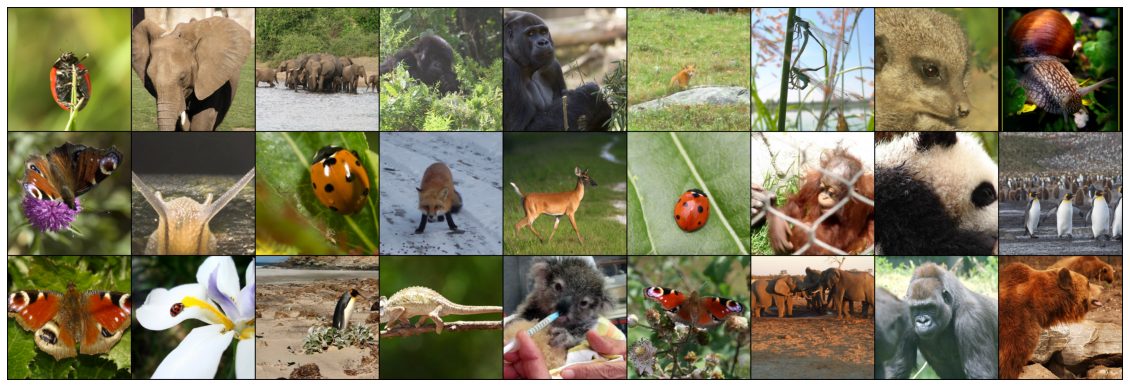

In [24]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [25]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        super(ResidualBlock, self).__init__() 
        """self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel))"""
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=(1,5), 
                                         stride=(1,stride), padding=(0,2), bias=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=(5,1), 
                                         stride=(stride,1), padding=(2,0), bias=True), 
                                  nn.BatchNorm2d(outchannel),
                                  nn.ReLU(inplace=True),
                                  Conv2d(outchannel, outchannel, kernel_size=(1,5), 
                                         stride=1, padding=(0,2), bias=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=(5,1), 
                                         stride=1, padding=(2,0), bias=True),
                                  nn.BatchNorm2d(outchannel))
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        out = self.left(x) 
        #print(out.size())
        #print(self.shortcut(x).size())
        out += self.shortcut(x) 
        out = F.relu(out) 
        #print(out.size())
        return out


    
# define resnet
class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        super(ResNet, self).__init__()
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        #New layer
        self.layer4 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        
        self.layer5 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer7 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        
        #New layer
        self.layer8 = nn.Conv2d(512,512,kernel_size=1,stride=1,padding=0,bias=False)
        self.maxpool = MaxPool2d(4)
    
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)

        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [27]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

from collections import Counter
class_lens = list(dict(Counter([og_dataset.targets[i] for i in train_set_mini.indices])).values())
class_lens = torch.Tensor(class_lens)
class_lens = 1.0/class_lens
class_lens = class_lens/class_lens.sum()
class_lens = class_lens.to(device=device, dtype=torch.float32)
print(class_lens)

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('\nGot %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, scheduler, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            #Weighted by class size
            loss = F.cross_entropy(scores, y, weight=class_lens)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()), end="\r")
        check_accuracy(loader_val, model)
        scheduler.step()
                

tensor([0.0276, 0.0359, 0.0804, 0.0310, 0.0324, 0.0532, 0.0596, 0.0402, 0.0303,
        0.0869, 0.0591, 0.0492, 0.0474, 0.0326, 0.0484, 0.1019, 0.0359, 0.0462,
        0.0581, 0.0436], device='cuda:0')
cuda:0


Total number of parameters is: 13735364
Epoch: 0, Iteration 420, loss = 1.9172
Got 2154 / 5994 correct of val set (35.94)
Epoch: 1, Iteration 420, loss = 1.8184
Got 3075 / 5994 correct of val set (51.30)
Epoch: 2, Iteration 420, loss = 1.4767
Got 3180 / 5994 correct of val set (53.05)
Epoch: 3, Iteration 420, loss = 0.9656
Got 3915 / 5994 correct of val set (65.32)
Epoch: 4, Iteration 420, loss = 1.1154
Got 4041 / 5994 correct of val set (67.42)
Epoch: 5, Iteration 420, loss = 0.6871
Got 4137 / 5994 correct of val set (69.02)
Epoch: 6, Iteration 420, loss = 0.7085
Got 4257 / 5994 correct of val set (71.02)
Epoch: 7, Iteration 420, loss = 0.5612
Got 4479 / 5994 correct of val set (74.72)
Epoch: 8, Iteration 420, loss = 0.4794
Got 4491 / 5994 correct of val set (74.92)
Epoch: 9, Iteration 420, loss = 0.4846
Got 4518 / 5994 correct of val set (75.38)

Got 4518 / 5994 correct of val set (75.38)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


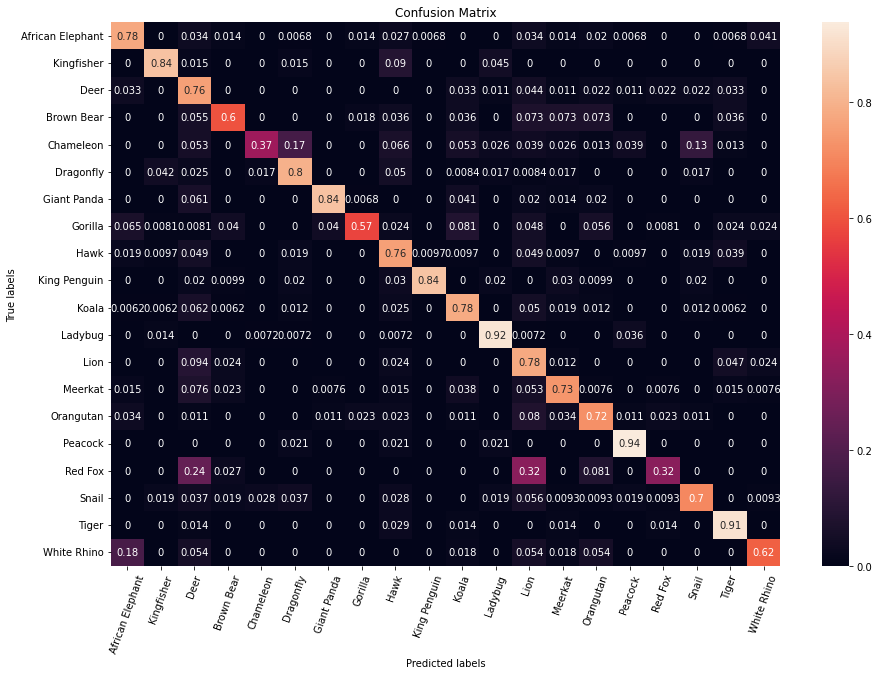

Predicted label ['Koala' 'Koala' 'Deer' 'Dragonfly' 'Hawk' 'Hawk' 'Dragonfly' 'Snail'
 'Meerkat']
True label ['Meerkat' 'Gorilla' 'Red Fox' 'Chameleon' 'Kingfisher' 'Dragonfly'
 'Peacock' 'Chameleon' 'Chameleon']
Corresponding images are shown below


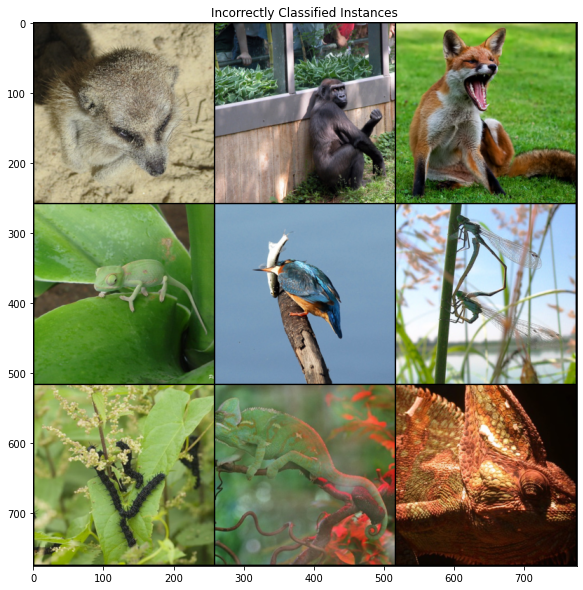

In [28]:
# define and train the network
model = MyResNet()
#lr 0.0001 originally
optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=1e-7) 
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, scheduler, epochs = 10)


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)


Got 1451 / 2001 correct of val set (72.51)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


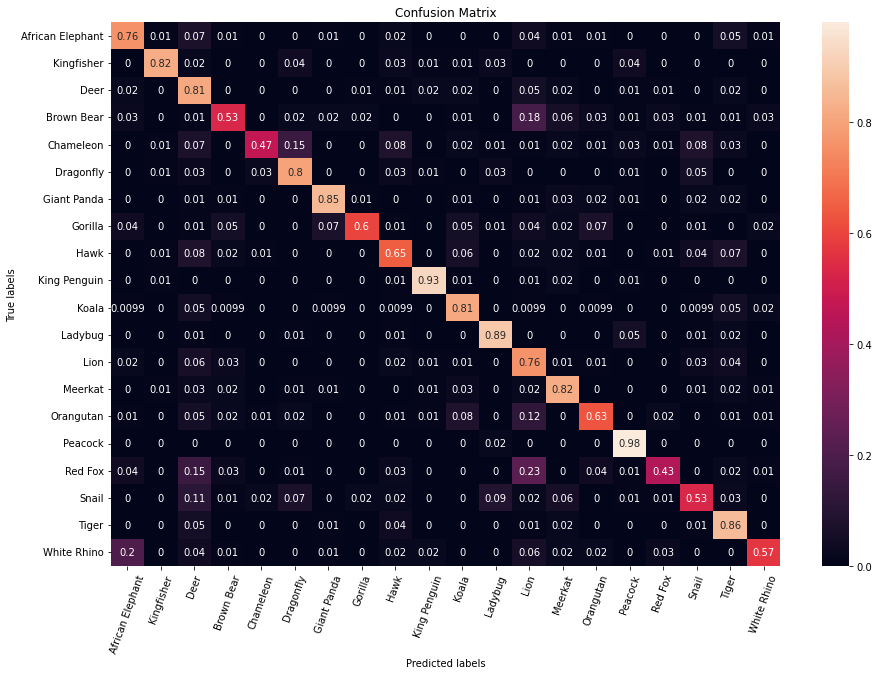

Predicted label ['White Rhino' 'Brown Bear' 'Koala' 'Lion' 'Deer' 'Koala' 'Deer' 'Ladybug'
 'Orangutan']
True label ['Brown Bear' 'Koala' 'Orangutan' 'Red Fox' 'Red Fox' 'Hawk' 'Dragonfly'
 'Kingfisher' 'Red Fox']
Corresponding images are shown below


0.7251374312843578

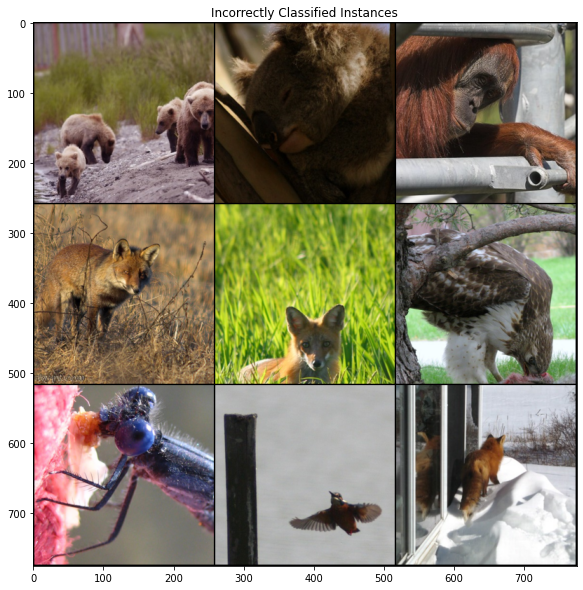

In [29]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

With a very high dimensional hyperparameter space, it would be best to perform a random search, and then performing a grid search around the best hyperparameter values found from the random search. Grid search is an exhaustive method to try all combinations of hyperparameters but thhe time taken to find the optimal hyperparameters in exponential in the dimensionlity of the hyperparameter space. Thus random search is more commonly used to choose a subset of points within the space and choose the best among those. This is much less computationally expensive while lending to similar results.

Alternatively, one could employ Bayesian optimisation to find good hyperparameters. This method uses the history of hyperparameters already explored in order to make a probabilistic model of the optimal hyperparameters. It updates its belief at every iteration using Bayes rule. While there is an extra step to choosing the next hyperparameter to explore, this computation is insignificant to calculating the performance of the set hyperparameters. This is considered the best approach as it uses all information gathered from the hyperparameter space.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

- Split 3x3 convolution into 1x5, 5x1 convolutions to reduce the computational complexity, while having similar performance.
- Implemented a learning rate scheduler, exponential decay to optimise learning towards the start of the process, and slowing down when local to an optimum, otherwise there would be oscillatory motion about the optimum
- Adding a dropout layer is not necessary due to the batch norm layers, which increase robustness by introducing noise into the network.
- Performed data augmentation of the input, including random contrast changes, rotations listed in the appendix of this paper: https://arxiv.org/pdf/1805.09501.pdf. This also helps create a more robust classifier.
- The class sizes of the training data were not in a uniform distribution so the classes with fewer samples were more poorly classified. A workaround is to weight the losses by the inverse of the class sizes.
- Added one more residual block to increase the depth of the network, and therefore increasing the cardinality of the set of functions that the neural network can represent.
- Artificially increased the size of the dataset by performing random transformsations on the same image, helping create a more robust classifier.
- Added a 1x1 convolution layer before the max pooling to increase the depth of the network without increasing the computational complexity as much as a fully connected layer.
- Batch size was not altered as the this learning schedule worked for this batch size



---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

The low level layers appear to be looking at colour feautures of the animal and the background. There are also edge detection filters present which pick out the outline of the animal. In particular the convolutional layer picks out the black and white features of the penguin and the overall outline.
Intermediate layers appear to pick out groups of edges and slightly more complex patterns and dominant image features.
The higher level layers pick out more complex features and highly abstract features from a heavily downsampled image.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

The classification performance of this model is not sufficient for production purposes and it may be improved in several ways:
- Perform hyperparameter tuning using Bayesian optimisation
- Train over a larger number of epochs ~100
- Increase the size of the training data artificially (10x instead of 3x)
- Use a deeper network such as ResNet50 which is known to perform better
- Experiment with batch size and optimise the learning rate scheduler

The above improvements would require access to more powerful compute as well as time.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

Other methods would include calculating the precision, recall and f1 scores for each class. These could be micro or macro averaged. Macro averaging would result place equal emphasis on all classes, regardless of their size.

$$Accuracy = \frac{TP+TN}{P+N}$$

$$Recall = \frac{TP}{TP+FN}$$

$$Precision = \frac{TP}{TP+FP}$$

$$F1 = \frac{2*precision*recall}{precision+recall}$$

The micro averaged F1 score is the same as the accuracy

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [32]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6', 'layer7', 'layer8']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

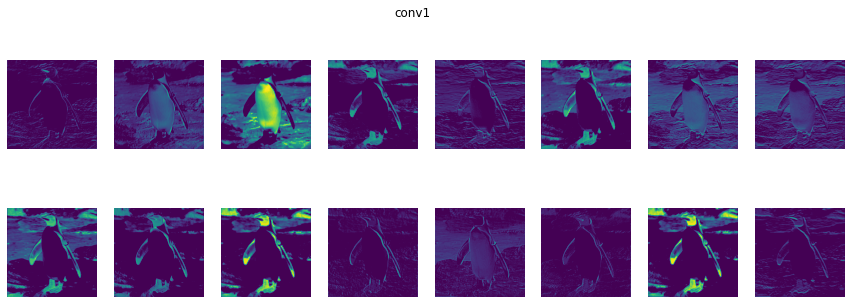

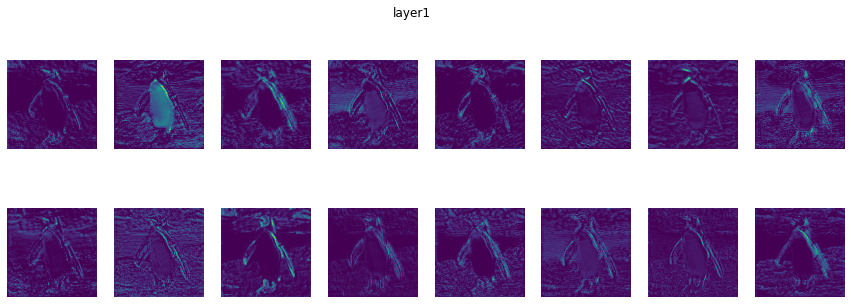

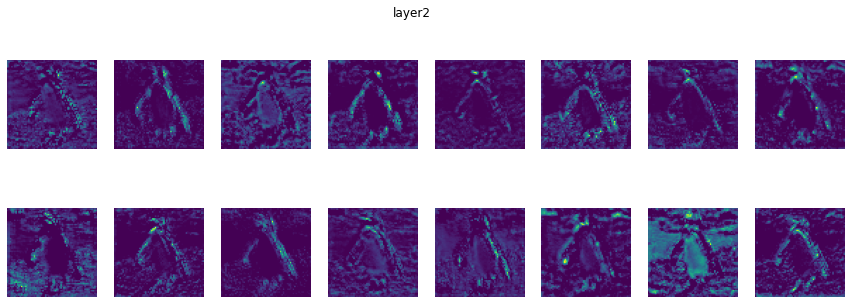

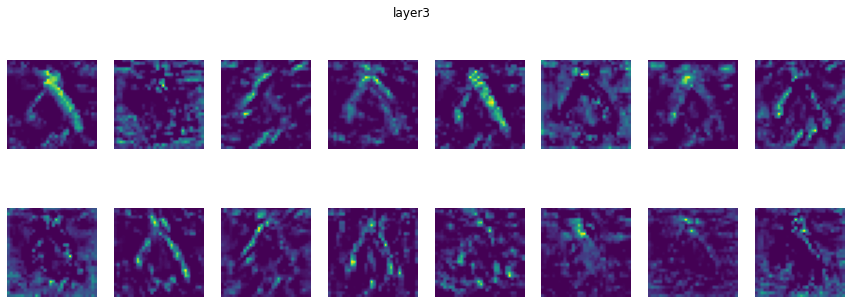

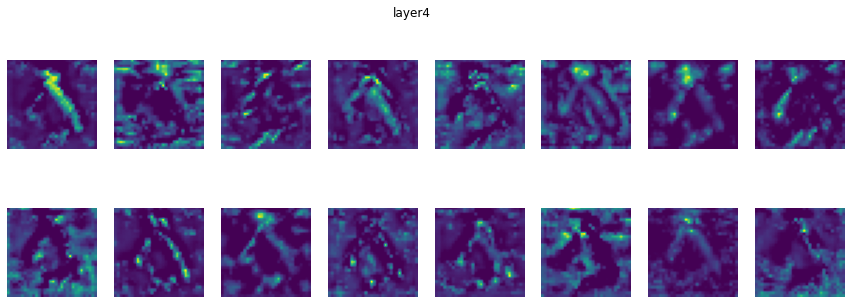

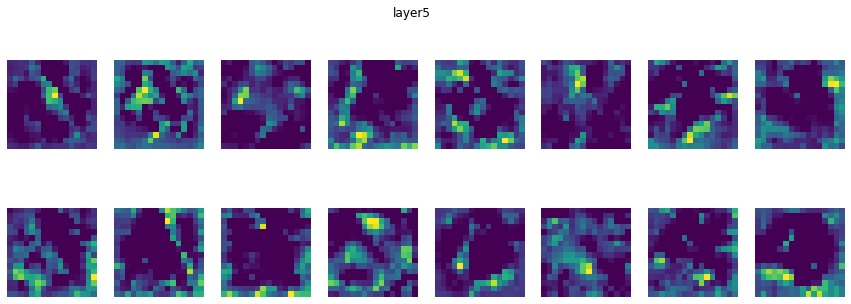

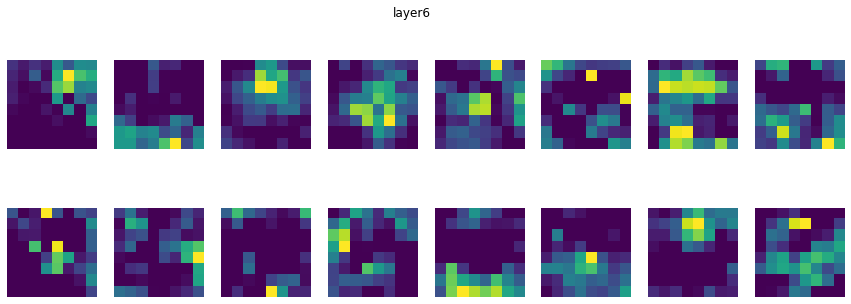

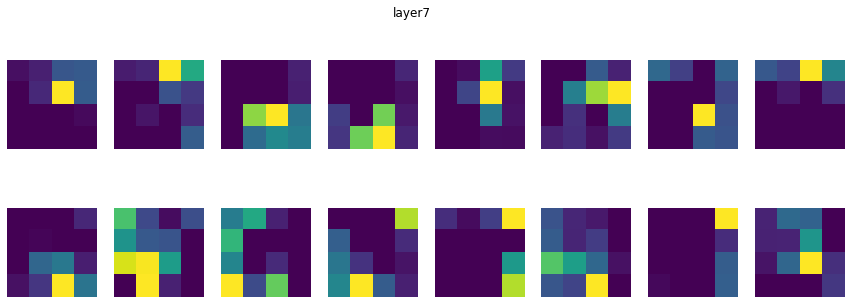

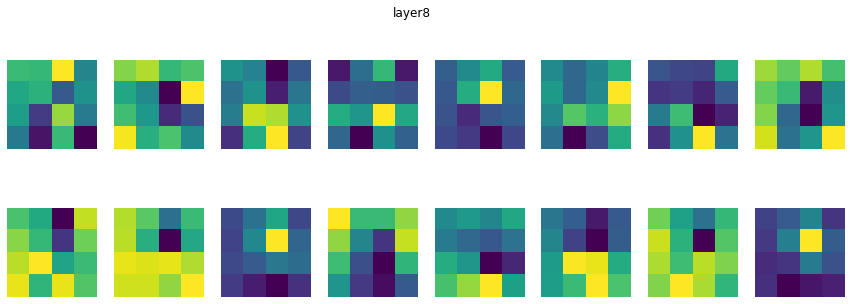

In [33]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [11]:
grader.check_all()

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed